
# Project: Investigate a Dataset - [Sales_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling And Cleaning">Data Wrangling And Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

<a id='intro'></a>
## Introduction

### Dataset Description :
### The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

<a id='wrangling And Cleaning'></a>
## Data Wrangling And Cleaning

In [2]:
df = pd.read_csv("all_data-Copy1.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.shape

(186850, 6)

In [5]:
df.columns = df.columns.str.replace(" ","_")

In [6]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [7]:
# handling NaN values:

nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna(how="all")

df.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [9]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
df["Order_Date"] = df["Order_Date"].str[0:8]

df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001"


In [11]:
temp_data = df[df["Order_Date"].str[0:2] == "Or"]

temp_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Da,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Da,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Da,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Da,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Da,Purchase Address


In [12]:
df = df[df["Order_Date"].str[0:2] != "Or"]

In [13]:
df.duplicated().sum()

264

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
# add a mounth column:

df["Month"] = df["Order_Date"].str[0:2]

df["Month"] = df["Month"].astype("int")

df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
Month                int32
dtype: object

In [17]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19,"669 Spruce St, Los Angeles, CA 90001",4


In [18]:
df["Order_ID"] = df["Order_ID"].astype("int")
df["Price_Each"] = df["Price_Each"].astype("float")
df["Quantity_Ordered"] = df["Quantity_Ordered"].astype("int")

df.dtypes

Order_ID              int32
Product              object
Quantity_Ordered      int32
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month                 int32
dtype: object

In [19]:
df["Total_Sales"] = df["Quantity_Ordered"] * df["Price_Each"]

df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [21]:
df.dtypes

Order_ID                     int32
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int32
Total_Sales                float64
dtype: object

In [22]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4,11.99


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( What was the best month for sales?)

In [23]:
best_mon = df.groupby("Month").sum().reset_index()

print("the best month for sales was:",best_mon[["Month","Total_Sales"]].max())

the best month for sales was: Month               12.0
Total_Sales    4608295.7
dtype: float64


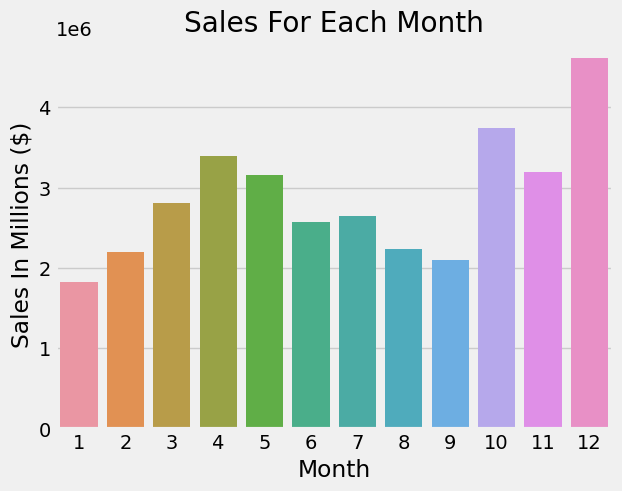

In [24]:
sns.barplot(x="Month",y="Total_Sales", data= best_mon)

plt.ylabel("Sales In Millions ($)")
plt.title("Sales For Each Month")
plt.show()

### Research Question 2  (What city sold the most product?)

In [25]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [26]:
df["City"] = df["Purchase_Address"].apply(lambda x: x.split(",")[1])

df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [27]:
most_city = df.groupby("City").sum().reset_index()

most_city.head(10)

,City,Order_ID,Quantity_Ordered,Price_Each,Month,Total_Sales
0,Atlanta,3.419485e+09,16584,2778608.69,104649,2794199.07
1,Austin,2.277506e+09,11137,1808340.03,69720,1818044.33
2,Boston,4.590961e+09,22494,3634398.40,140898,3658627.65
3,Dallas,3.410206e+09,16707,2750026.38,104447,2765373.96
4,Los Angeles,6.801454e+09,33247,5417171.70,208020,5448304.28
5,New York City,5.729940e+09,27903,4632920.54,175557,4661867.14
6,Portland,2.864927e+09,14037,2306588.80,87636,2319331.94
7,San Francisco,1.028721e+10,50169,8204001.38,314949,8254743.55
8,Seattle,3.402481e+09,16534,2730586.55,104817,2745046.02


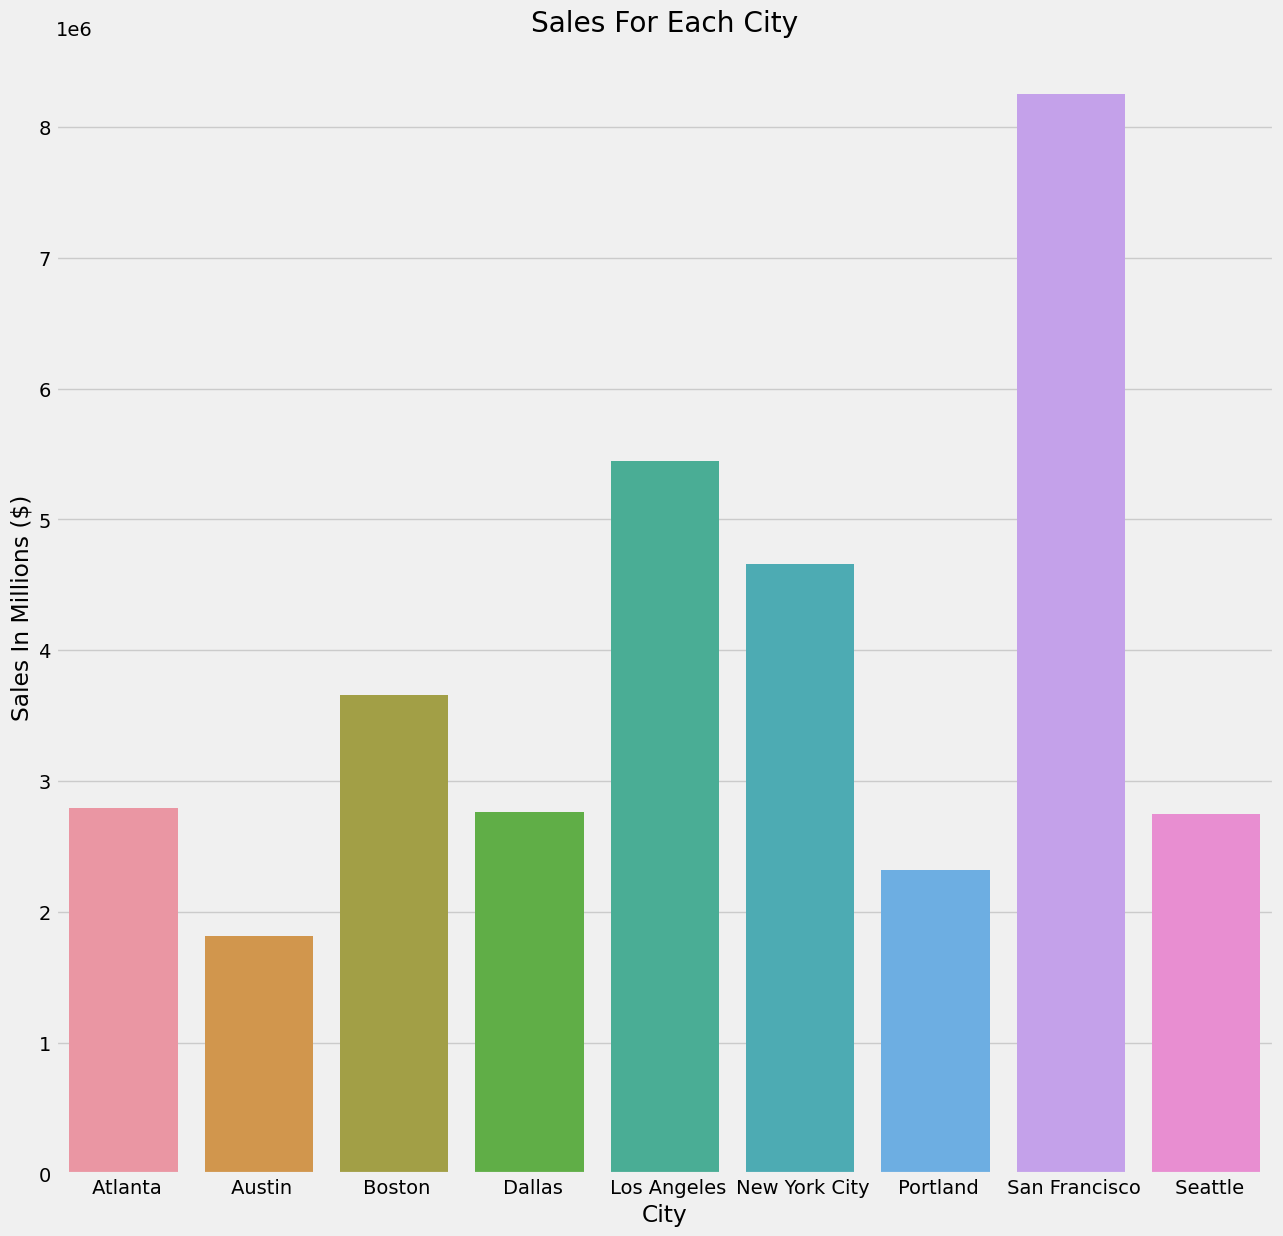

In [28]:
plt.figure(figsize=(14,14))

sns.barplot(x="City",y="Total_Sales", data = most_city)

plt.ylabel("Sales In Millions ($)")
plt.title("Sales For Each City")
plt.show()

### Research Question 3 (What product sold the most?)

In [29]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [30]:
most_pro = df.groupby("Product").sum().reset_index()

most_pro.head()

,Product,Order_ID,Quantity_Ordered,Price_Each,Month,Total_Sales
0,20in Monitor,9.502477e+08,4126,450739.02,29319,453818.74
1,27in 4K Gaming Monitor,1.441315e+09,6239,2427687.75,44396,2433147.61
2,27in FHD Monitor,1.722024e+09,7541,1124625.02,52484,1131074.59
3,34in Ultrawide Monitor,1.417418e+09,6192,2346058.26,43258,2352898.08
4,AA Batteries (4-pack),4.739759e+09,27615,78942.72,145423,106041.60


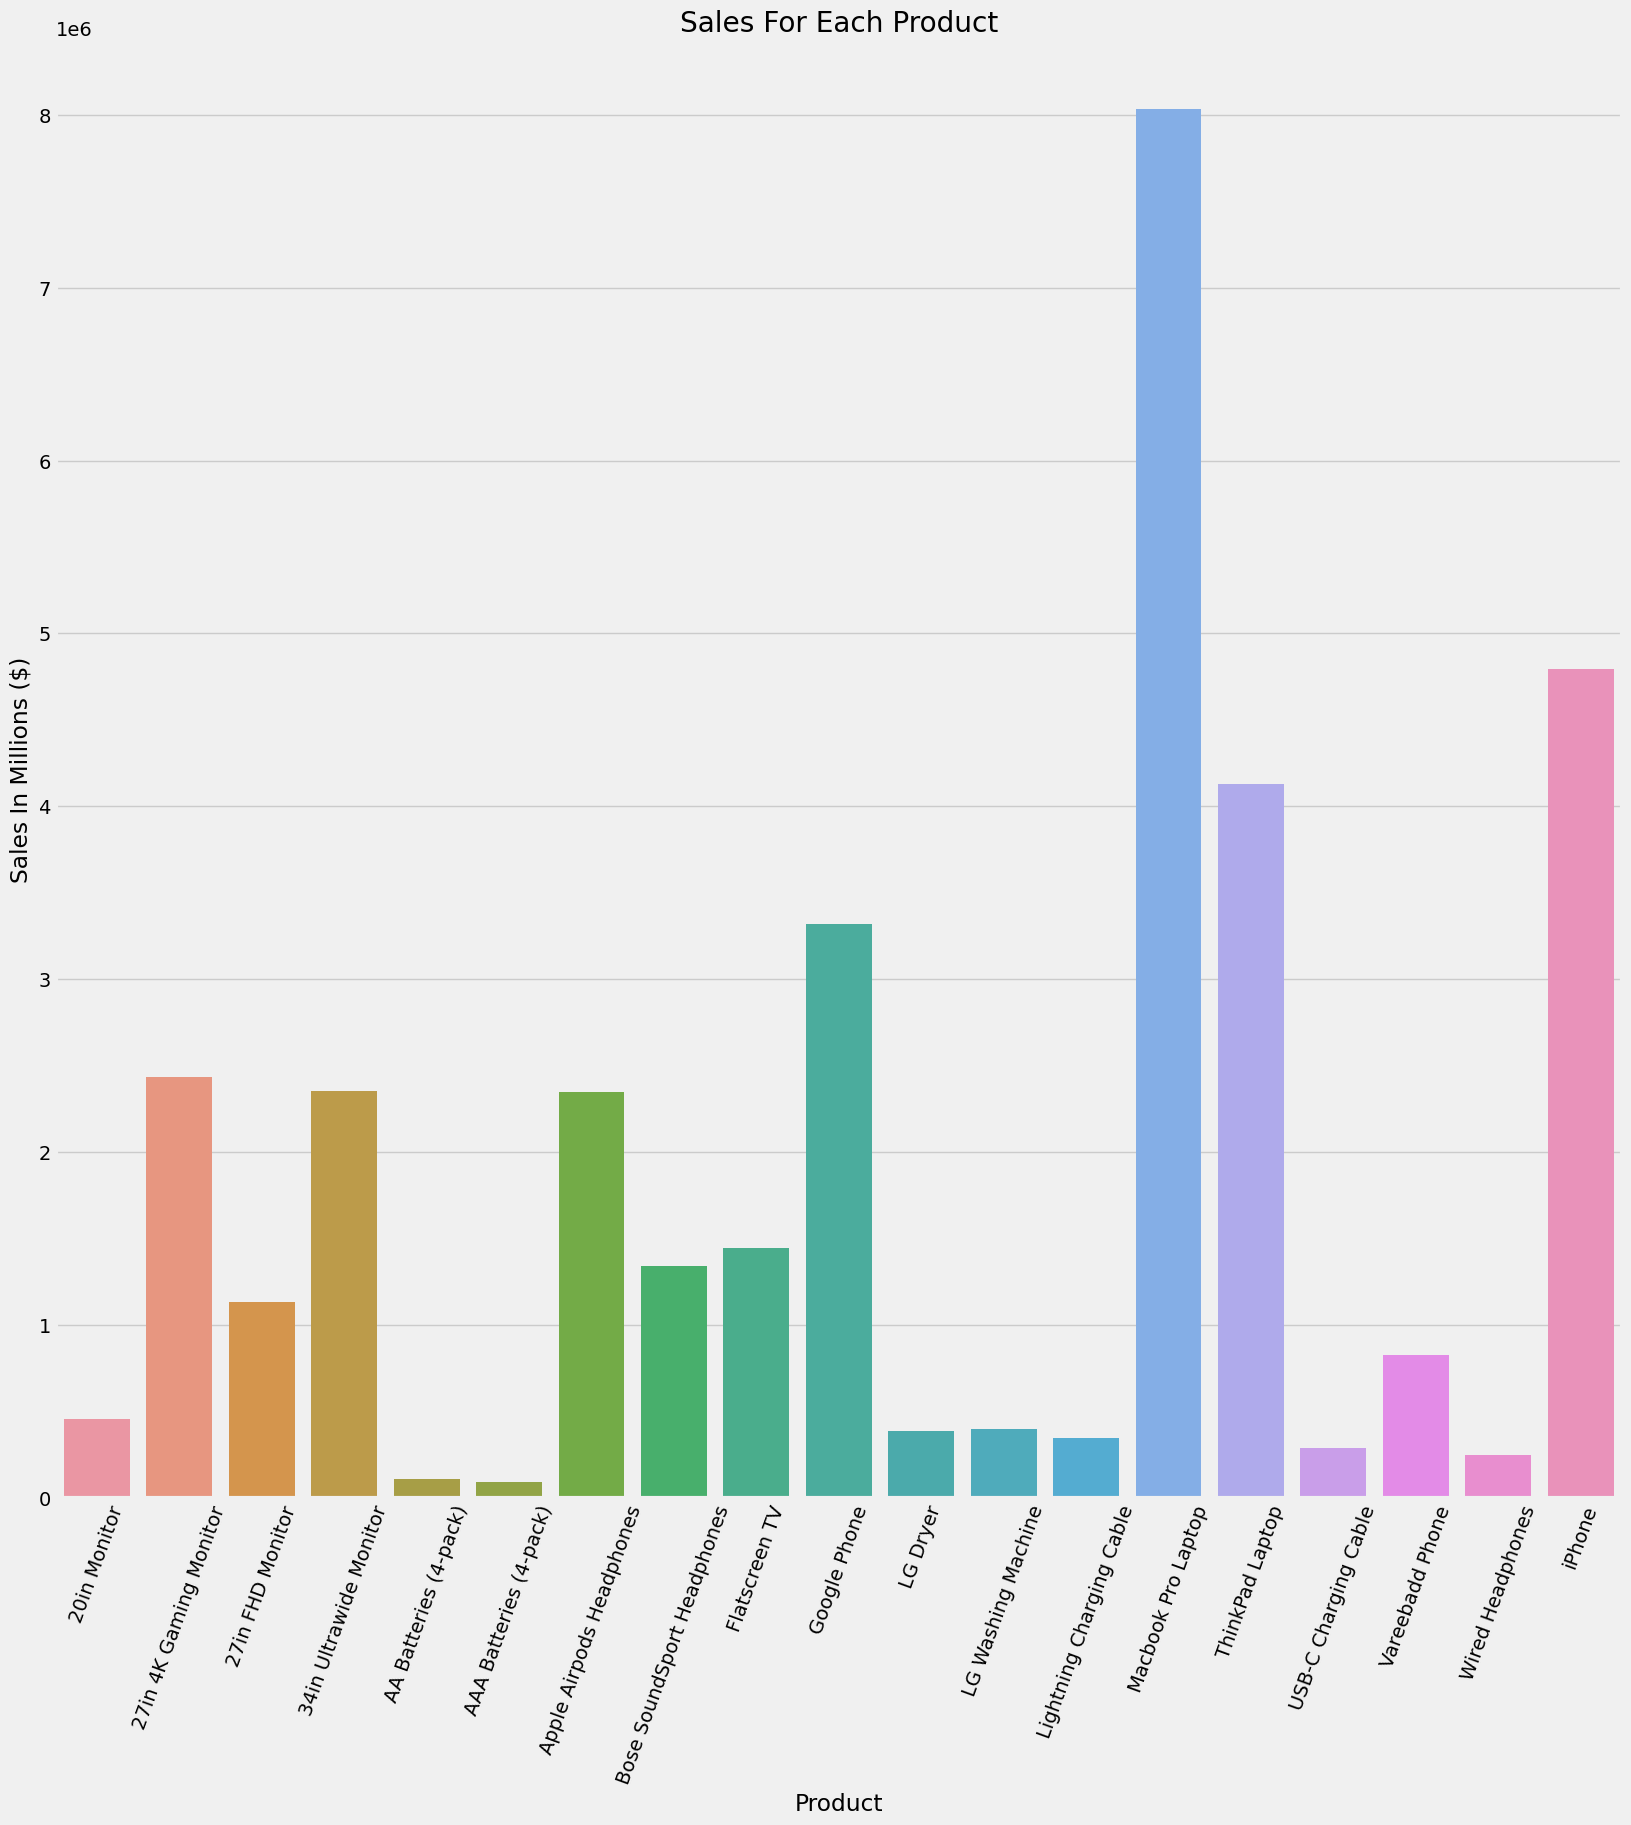

In [31]:
plt.figure(figsize=(18,18))

sns.barplot(x="Product",y="Total_Sales", data = most_pro)

plt.ylabel("Sales In Millions ($)")
plt.title("Sales For Each Product")
plt.xticks(rotation=70)
plt.show()

### Research Question 4 ( What was the best day for sales?)

In [32]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [33]:
df["Day"]  = df["Order_Date"].dt.day_name()

df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales,City,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Sunday
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Friday


In [34]:
most_day = df.groupby("Day").sum().round().reset_index()

most_day

,Day,Order_ID,Quantity_Ordered,Price_Each,Month,Total_Sales
0,Friday,6.029075e+09,29415,4828499.0,184431,4853642.0
1,Monday,6.154558e+09,29860,4845025.0,190171,4877588.0
2,Saturday,6.075226e+09,29729,4868948.0,185550,4900196.0
3,Sunday,6.130428e+09,29745,4898307.0,188577,4927249.0
4,Thursday,6.067277e+09,29618,4804342.0,185210,4833764.0
5,Tuesday,6.273482e+09,30686,5059472.0,192956,5086275.0
6,Wednesday,6.054121e+09,29759,4958050.0,183798,4986823.0


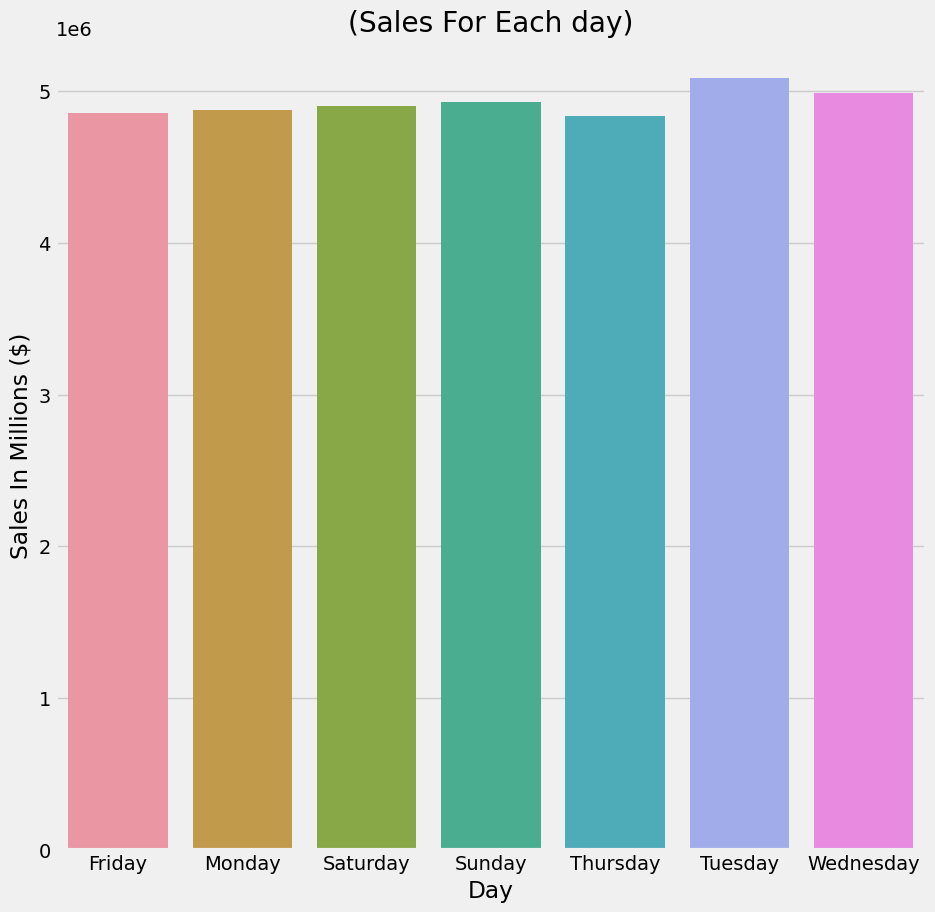

In [35]:
plt.figure(figsize=(10,10))

sns.barplot(x="Day",y="Total_Sales", data = most_day)

plt.ylabel("Sales In Millions ($)")
plt.title("(Sales For Each day)")
#plt.xticks(rotation=60)
plt.show()